In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

In [39]:
df=pd.read_csv('PlayTennis.csv')
df.head()

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [40]:
encoder=LabelEncoder()
df=df.apply(encoder.fit_transform)
df.head()

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1


In [41]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [42]:
# init
cart_model = DecisionTreeClassifier(criterion='gini',max_depth=2) 
id3_model = DecisionTreeClassifier(criterion='entropy',max_depth=2) 

In [43]:
# Fit
cart_model.fit(x,y)
id3_model.fit(x,y)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [44]:
# predict
cart_pred = cart_model.predict(x)
id3_pred = id3_model.predict(x)

In [46]:
# CM
cart_cm = confusion_matrix(y,cart_pred)
id3_cm = confusion_matrix(y,id3_pred)

In [47]:
# CMD
cart_cmd = ConfusionMatrixDisplay(cart_cm)
id3_cmd = ConfusionMatrixDisplay(id3_cm)

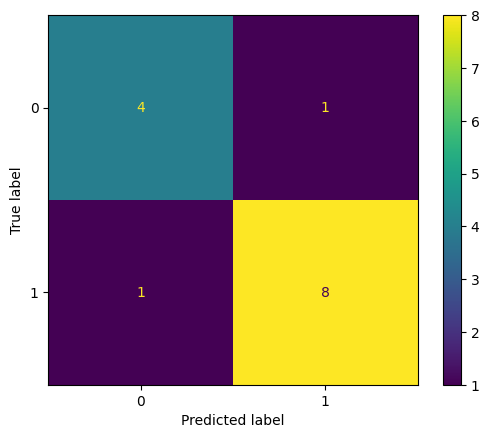

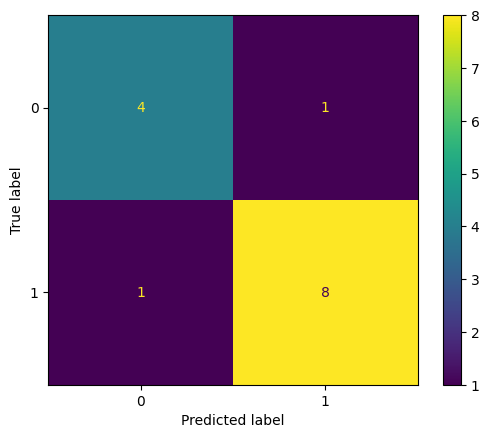

In [48]:
# PLOT CMD
cart_cmd.plot()
id3_cmd.plot()

[Text(0.4, 0.8333333333333334, 'x[0] <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.6, 0.5, 'x[2] <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.722\nsamples = 5\nvalue = [1, 4]')]

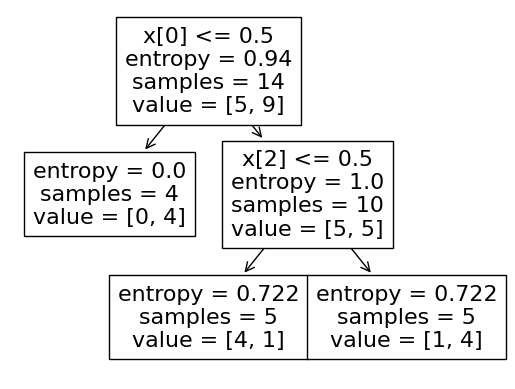

In [50]:
# PLOT TREE
tree.plot_tree(cart_model)

[Text(0.4, 0.8333333333333334, 'x[0] <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.6, 0.5, 'x[2] <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.722\nsamples = 5\nvalue = [1, 4]')]

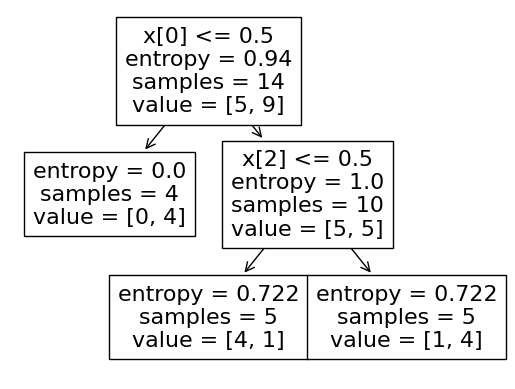

In [51]:
tree.plot_tree(id3_model)